In [ ]:
import numpy as np
import tensorflow as tf
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
mean=[0, 3],
cov=[[1, 0.5],[0.5, 1]],
size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
mean=[3, 0],
cov=[[1, 0.5],[0.5, 1]],
size=num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
np.ones((num_samples_per_class, 1), dtype="float32")))#just for color
print(inputs ,targets)


[[ 1.2681384   3.9698918 ]
 [ 1.9229653   5.071279  ]
 [ 1.1483586   2.943713  ]
 ...
 [ 2.704226    0.11037114]
 [ 1.2303144  -0.78419536]
 [ 1.7507267  -0.8405842 ]] [[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


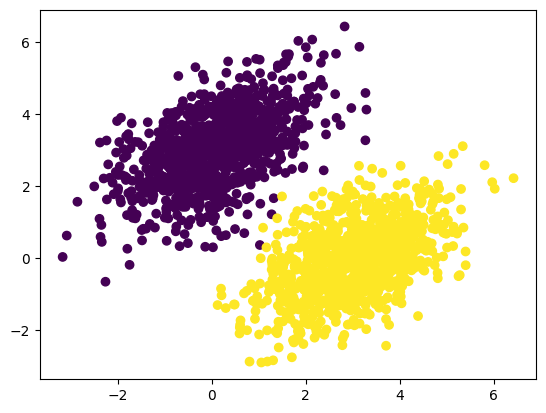

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [ ]:
input_dim = 2
output_dim = 1
w = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
print(w,b)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.94366574],
       [0.6436219 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [ ]:
def model(inputs):
  return tf.matmul(inputs,w)+b
def square_loss(targets,predictions):
  per_sample_losses=tf.square(targets-predictions)
  #print(per_sample_losses)
  return tf.reduce_mean(per_sample_losses)

learning_rate=0.01
def training_step(inputs, targets):
  with tf.GradientTape() as tape:
      predictions = model(inputs)
      #print(predictions)
      loss = square_loss(predictions, targets)
      #print(loss)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [w, b])
  w.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")
print(model(inputs))

Loss at step 0: 0.0254
Loss at step 1: 0.0254
Loss at step 2: 0.0254
Loss at step 3: 0.0254
Loss at step 4: 0.0254
Loss at step 5: 0.0254
Loss at step 6: 0.0254
Loss at step 7: 0.0254
Loss at step 8: 0.0254
Loss at step 9: 0.0254
Loss at step 10: 0.0254
Loss at step 11: 0.0254
Loss at step 12: 0.0254
Loss at step 13: 0.0254
Loss at step 14: 0.0254
Loss at step 15: 0.0254
Loss at step 16: 0.0254
Loss at step 17: 0.0254
Loss at step 18: 0.0254
Loss at step 19: 0.0254
Loss at step 20: 0.0254
Loss at step 21: 0.0254
Loss at step 22: 0.0254
Loss at step 23: 0.0253
Loss at step 24: 0.0253
Loss at step 25: 0.0253
Loss at step 26: 0.0253
Loss at step 27: 0.0253
Loss at step 28: 0.0253
Loss at step 29: 0.0253
Loss at step 30: 0.0253
Loss at step 31: 0.0253
Loss at step 32: 0.0253
Loss at step 33: 0.0253
Loss at step 34: 0.0253
Loss at step 35: 0.0253
Loss at step 36: 0.0253
Loss at step 37: 0.0253
Loss at step 38: 0.0253
Loss at step 39: 0.0253
tf.Tensor(
[[0.09620735]
 [0.04310119]
 [0.2232793

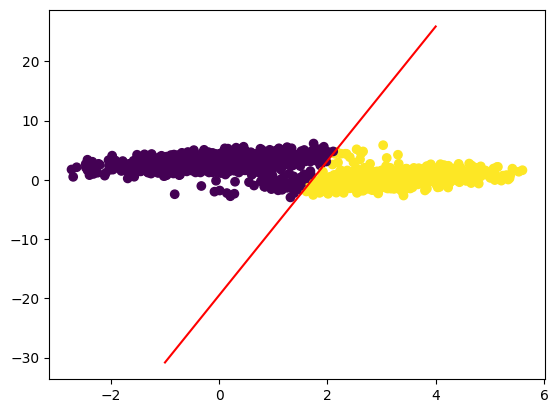

In [ ]:
predictions=model(inputs)
x = np.linspace(-1, 4, 100)
y = - w[0] / w[1] * x + (0.5 - b) / w[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()